In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [16]:
df = pd.read_csv('../datasets/df.csv')
clean_test_df = pd.read_csv('../datasets/clean_test_df.csv')

In [18]:
#Not sure why setting id to index is not transfering between notebooks
df.set_index('Id')

,Overall Qual,Gr Liv Area,Garage Area,Garage Cars,Total Bsmt SF,1st Flr SF,Year Built,Year Remod/Add,Full Bath,Mas Vnr Area,...,Garage Type_none,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Misc Feature_none,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed
Id,,,,,,,,,,,,,,,,,,,,,
109,6,1479,475.0,2.0,725.0,725,1976,2005,2,289.0,...,0,0,0,0,1,1,0,0,0,0
544,7,2122,559.0,2.0,913.0,913,1996,1997,2,132.0,...,0,0,0,0,1,1,0,0,0,0
153,5,1057,246.0,1.0,1057.0,1057,1953,2007,1,0.0,...,0,0,0,0,1,1,0,0,0,0
318,5,1444,400.0,2.0,384.0,744,2006,2007,2,0.0,...,0,0,0,0,1,1,0,0,0,0
255,6,1445,484.0,2.0,676.0,831,1900,1993,2,0.0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,8,1728,520.0,2.0,1884.0,1728,2007,2007,2,0.0,...,0,0,0,0,1,1,0,0,0,0
785,4,861,539.0,2.0,861.0,861,1940,1950,1,0.0,...,0,0,0,0,1,1,0,0,0,0
916,6,1913,342.0,2.0,896.0,1172,1928,1950,1,0.0,...,0,0,0,0,1,1,0,0,0,0


In [11]:
clean_test_df.set_index('Id')

,Overall Qual,Gr Liv Area,Garage Area,Garage Cars,Total Bsmt SF,1st Flr SF,Year Built,Year Remod/Add,Full Bath,Mas Vnr Area,...,Misc Feature_Shed,Misc Feature_none,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Neighborhood_Landmrk,Neighborhood_GrnHill,Misc Feature_TenC
Id,,,,,,,,,,,,,,,,,,,,,
2658,6,1928,440,1,1020,908,1910,1950,2,0.0,...,0,1,1,0,0,0,0,0,0,0
2718,5,1967,580,2,1967,1967,1977,1977,2,0.0,...,0,1,1,0,0,0,0,0,0,0
2414,7,1496,426,2,654,664,2006,2006,2,0.0,...,0,1,1,0,0,0,0,0,0,0
1989,5,968,480,2,968,968,1923,2006,1,0.0,...,0,1,1,0,0,0,0,0,0,0
625,6,1394,514,2,1394,1394,1963,1963,1,247.0,...,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,6,1877,488,2,1084,1084,1974,1974,2,0.0,...,0,1,1,0,0,0,0,0,0,0
1234,6,1988,480,2,1104,1104,1966,1999,2,410.0,...,0,1,1,0,0,0,0,0,0,0
1373,5,1211,322,1,952,1211,1968,1968,1,0.0,...,0,1,0,0,1,0,0,0,0,0


In [12]:
df.shape

(2042, 74)

In [13]:
clean_test_df.shape

(878, 73)

All of my low correlations are catergotical data, in my everything notebook I already selected out stronger numeric features

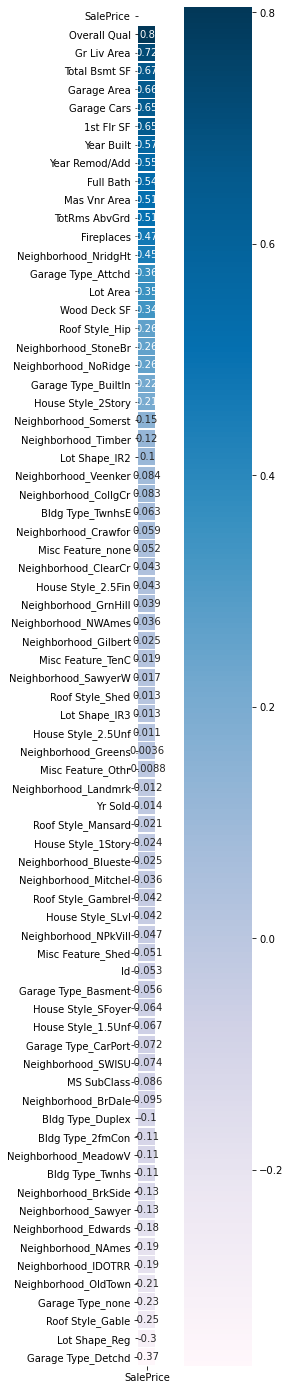

In [19]:
## make a quick heatmap on price
corr = df.corr()
corr_price = corr[["SalePrice"]].sort_values(by= "SalePrice", ascending = False)

mask = np.zeros_like(corr_price)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (10,25))

sns.heatmap(corr_price,
           annot = True,
           cmap= "PuBu",
            square = True,
           mask = mask,
           linewidths = .5
           );

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


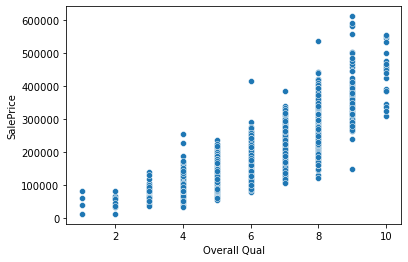

In [9]:
sns.scatterplot(df['Overall Qual'], df['SalePrice']);

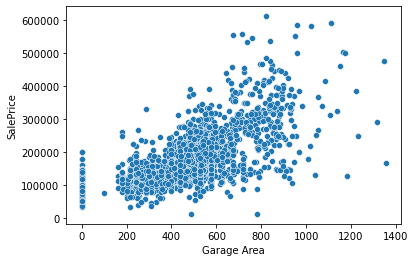

In [29]:
sns.scatterplot(df['Garage Area'], df['SalePrice']);

Looking back, I probably should have removed the houses without garages or basements.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


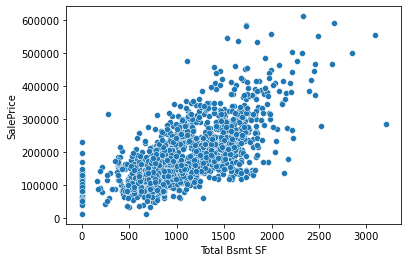

In [30]:
sns.scatterplot(df['Total Bsmt SF'], df['SalePrice']);

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


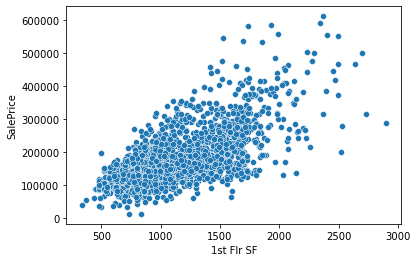

In [23]:
sns.scatterplot(df['1st Flr SF'], df['SalePrice']);